# Replication of vanParidon and Thompson

For the first set of tests, each language model was evaluated using the same datasets used in van Paridon and Thompson (2019) (see appendix X for list).  The same methodology was used - ridge regression predicting database norms.  Table X shows the top three results by adjusted r-squared for each language included.  The results clearly demonstrate that the selected dimension and window size used in the original experiment (300 dimensions, 5 window size) are not the optimal parameters to use across different languages (and aren't truly optimal for any given language).

In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import sys
from IPython.display import display



inbasedir = os.path.join('Y:\\', 'Dissertation')
outbasedir = os.path.join('Z:\\', 'Dissertation')
datadir = "data"
modeldir = 'models'
evaldir = 'evals'
scoredir = 'scores'


codepath = os.path.join(inbasedir, 'workspace', 'word2manylanguages', 'python')
sys.path.append(codepath)
import word2manylanguages as wm

dimensions = ["500", "300", "200", "100", "50"]
windows = ["1", "2", "3","4", "5", "6"]
languages = ['de', 'en', 'es', 'fa', 'fi', 'fr', 'id', 'it', 'ms', 'nl', 'pl', 'pt', 'tr']



In [2]:
def eval(language):
    for dim in dimensions:
        for win in windows:
            for algo in ['cbow', 'sg']:
                base_file_name = f'{language}_{str(dim)}_{str(win)}_{algo}'
                print("Evaluating model " + base_file_name)
                path = os.path.join(inbasedir, modeldir, f'{base_file_name}_wxd.csv')
                wordsXdims = pd.read_csv(path)
                wordsXdims.set_index('word', inplace=True)
                scores = wm.evaluate_norms_vp(language, wordsXdims)

                outpath = os.path.join(outbasedir, evaldir)
                fname = base_file_name + '_eval.csv'
                outfile = os.path.join(outpath, fname)
                scores.to_csv(outfile)
                    

In [3]:
def score(language):
    rows = []
    base_file_name = f'{language}*_eval.csv'
    evalpath = os.path.join(outbasedir, evaldir)
    files = glob.glob(evalpath + "\\" + base_file_name)
    
    for file in files:    
        print("Loading eval " + file) 
        
        p1 = str(file).split("\\")
        parts = p1[len(p1) - 1].split('_')
    
        eval = pd.read_csv(file, header=0)

        for index, stuff in eval.iterrows():
            row = dict()
            row['Language'] = language
            row['Dimensions'] = parts[1]
            row['Window'] = parts[2]
            row['Algorithm'] = parts[3]
            row['Norm'] = stuff['norm']
            row['Score'] = stuff['adjusted r-squared']
            rows.append(row)

    dataframe = pd.DataFrame(rows)   
    dataframe.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)

    outfilename = f'{language}_scores.csv'
    outfile = os.path.join(outbasedir, scoredir, outfilename)
    dataframe.to_csv(outfile)

In [4]:
# Evaluate each language for each model
for language in languages:
    #eval(language)
    pass


In [5]:
# Score each language
for language in languages:
    score(language)

Loading eval Z:\Dissertation\evals\de_100_1_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_1_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_2_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_2_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_3_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_3_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_4_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_4_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_5_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_5_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_6_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_100_6_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_200_1_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_200_1_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_200_2_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\de_200_2_sg_wxd_eval.csv
Loading eval Z:\Disserta

Loading eval Z:\Dissertation\evals\es_200_2_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_3_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_3_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_4_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_4_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_5_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_5_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_6_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_200_6_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_300_1_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_300_1_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_300_2_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_300_2_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_300_3_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_300_3_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\es_300_4_cbow_wxd_eval.csv
Loading eval Z:\Disserta

Loading eval Z:\Dissertation\evals\fi_50_1_sg_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_2_cbow_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_2_sg_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_3_cbow_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_3_sg_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_4_cbow_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_4_sg_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_5_cbow_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_5_sg_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_6_cbow_eval.csv
Loading eval Z:\Dissertation\evals\fi_50_6_sg_eval.csv
Loading eval Z:\Dissertation\evals\fr_100_1_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\fr_100_1_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\fr_100_2_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\fr_100_2_sg_wxd_eval.csv
Loading eval Z:\Dissertation\evals\fr_100_3_cbow_wxd_eval.csv
Loading eval Z:\Dissertation\evals\fr_100_3_sg_wxd_eval.csv
Loading eval Z:\Dis

Loading eval Z:\Dissertation\evals\it_300_3_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_300_4_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_300_4_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_300_5_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_300_5_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_300_6_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_300_6_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_500_1_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_500_1_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_500_2_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_500_2_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_500_3_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_500_3_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_500_4_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_500_4_sg_eval.csv
Loading eval Z:\Dissertation\evals\it_500_5_cbow_eval.csv
Loading eval Z:\Dissertation\evals\it_500_5_sg_eval.csv
Loading eval Z:\Dissertation\eva

Loading eval Z:\Dissertation\evals\nl_50_4_cbow_eval.csv
Loading eval Z:\Dissertation\evals\nl_50_4_sg_eval.csv
Loading eval Z:\Dissertation\evals\nl_50_5_cbow_eval.csv
Loading eval Z:\Dissertation\evals\nl_50_5_sg_eval.csv
Loading eval Z:\Dissertation\evals\nl_50_6_cbow_eval.csv
Loading eval Z:\Dissertation\evals\nl_50_6_sg_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_1_cbow_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_1_sg_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_2_cbow_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_2_sg_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_3_cbow_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_3_sg_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_4_cbow_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_4_sg_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_5_cbow_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_5_sg_eval.csv
Loading eval Z:\Dissertation\evals\pl_100_6_cbow_eval.csv
Loading eval Z:\Dissertation\evals\p

Loading eval Z:\Dissertation\evals\tr_300_5_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_300_5_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_300_6_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_300_6_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_1_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_1_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_2_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_2_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_3_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_3_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_4_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_4_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_5_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_5_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_6_cbow_eval.csv
Loading eval Z:\Dissertation\evals\tr_500_6_sg_eval.csv
Loading eval Z:\Dissertation\evals\tr_50_1_cbow_eval.csv
Loading eval Z:\Dissertation\ev

In [6]:
# Pick top 3 for each language
scorepath = os.path.join(outbasedir, scoredir)
files = glob.glob(scorepath + "\\*_scores.csv")
rows = list()

cols = ['Index','Language','Dimensions','Window','Algorithm', 'Norm', 'Score']

for file in files:
    #print("Loading scores " + file)
    df = pd.read_csv(file, header=0)
    df.columns = cols
    df.set_index('Index', inplace=True)
    #print(df)

    df.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    count = 0
    for index, stuff in df.iterrows():
        rows.append(stuff)
        count+=1
        if count>2:break



scores = pd.DataFrame(rows)
outfile = os.path.join(scorepath,"top_3_by_language.csv")
scores.to_csv(outfile)

display(scores)


,Language,Dimensions,Window,Algorithm,Norm,Score
301,de,300,1,sg,imageability (older adults),0.671917
469,de,500,1,sg,imageability (older adults),0.665417
145,de,200,1,cbow,imageability (older adults),0.658830
3954,en,500,1,sg,concreteness,0.661222
4164,en,500,2,sg,concreteness,0.652581
2904,en,300,2,sg,concreteness,0.645889
1030,es,500,3,sg,pleasant taste,0.653421
980,es,500,2,sg,pleasant taste,0.647015
680,es,300,2,sg,pleasant taste,0.643293
2,fa,100,1,cbow,imageability,0.479073


In [7]:
# Pick top 3 for each language by algorithm
scorepath = os.path.join(outbasedir, scoredir)
files = glob.glob(scorepath + "\\*_scores.csv")
rows = list()

cols = ['Index','Language','Dimensions','Window','Algorithm', 'Norm', 'Score']

for file in files:
    #print("Loading scores " + file)
    df = pd.read_csv(file, header=0)
    df.columns = cols
    df.set_index('Index', inplace=True)

    # Top 3 cbow
    df.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    df_cbow = df.loc[df['Algorithm'] == 'cbow']
    count = 0
    for index, stuff in df_cbow.iterrows():
        rows.append(stuff)
        count+=1
        if count>2:break
            
    # Top 3 sg
    df.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    df_sg = df.loc[df['Algorithm'] == 'sg']
    count = 0
    for index, stuff in df_sg.iterrows():
        rows.append(stuff)
        count+=1
        if count>2:break



scores = pd.DataFrame(rows)
outfile = os.path.join(scorepath,"top_3_per_algo.csv")
scores.to_csv(outfile)


In the following two heatmaps, we can see the distribution of the top three languages by dimension and window size.  The heatmaps are separated by algorithm.  Results for the Continuous Bag of Words (CBOW) algorithm cluster heavily around lower dimensionality and small window sizes, while the Skip-gram results show slightly more variability, albeit with the preponderance of the results still favoring low dimensionality and small windows.

In [8]:
# Make heatmaps by algo
file = os.path.join(scorepath,"top_3_per_algo.csv")
df = pd.read_csv(file, header=0)

In [9]:
df_cbow = df.loc[df['Algorithm'] == 'cbow']

# Grind up the values for cbow
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_cbow)):
    r = dimensions.index(str(df_cbow.iloc[i]['Dimensions']))
    c = windows.index(str(df_cbow.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_cbow.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

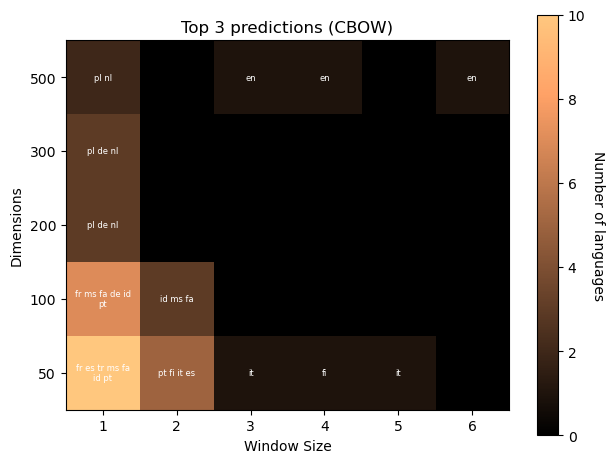

In [10]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions (CBOW)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()


In [11]:
df_sg = df.loc[df['Algorithm'] == 'sg']

# Grind up the values for wiki sg
counts = np.zeros((len(dimensions), len(windows)), dtype=np.int8)
labels = list()
for i in range(len(dimensions)):
    row = list()
    for j in range(len(windows)):
        row.append(set())
    labels.append(row)

for i in range(len(df_sg)):
    r = dimensions.index(str(df_sg.iloc[i]['Dimensions']))
    c = windows.index(str(df_sg.iloc[i]['Window']))
    counts[r][c] += 1
    labels[r][c].add(df_sg.iloc[i]["Language"])
    
for i in range(len(labels)):
    for j in range(len(labels[i])):
        # Put returns in place of every fifth space.
        labelset = list(labels[i][j])
        label = ""
        c = 0;
        if labelset != None:
            for k in range(len(labelset)):
                label += labelset[k]
                c += 1
                if c == 5:
                    label += '\n'
                    c = 0
                else:
                    label += ' '
        labels[i][j] = label.strip()

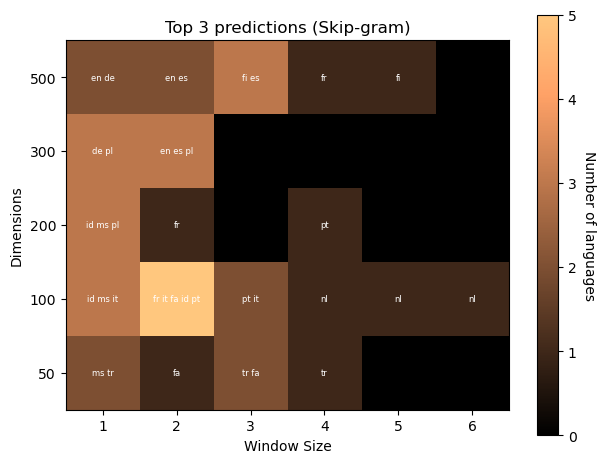

In [12]:
# Make the heatmap

fig, ax = plt.subplots()
im = ax.imshow(counts, cmap="copper")

# Create colorbar
cbar_kw = {}
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel("Number of languages", rotation=-90, va="bottom")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(windows)), labels=windows)
ax.set_yticks(np.arange(len(dimensions)), labels=dimensions)


# Loop over data dimensions and create text annotations.
for i in range(len(dimensions)):
    for j in range(len(windows)):
        text = ax.text(j, i, labels[i][j],
                       ha="center", va="center", color="w", size=6)

ax.set_title("Top 3 predictions (Skip-gram)")
ax.set_ylabel("Dimensions", rotation=90, va="bottom")
ax.set_xlabel("Window Size")
fig.tight_layout()
plt.show()

Given the variability of the results, we conclude that no one set of parameters can fit every language.